In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Glass\Glass_AN_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,NaN,NaN,0.48,NaN,NaN,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,NaN,NaN,NaN,NaN,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	0
float64		column 2	11
float64		column 3	15
float64		column 4	25
float64		column 5	36
float64		column 6	31
float64		column 7	36
float64		column 8	30
float64		column 9	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,214.000000,203.000000,199.000000,189.000000,178.000000,183.000000,178.000000,184.000000,214.000000
mean,1.518365,13.400049,2.736633,1.447672,72.638708,0.482459,8.935506,0.160598,0.057009
std,0.003037,0.815034,1.419446,0.488755,0.755150,0.543270,1.337529,0.491357,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.915000,2.335000,1.190000,72.252500,0.145000,8.247500,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.380000,72.790000,0.560000,8.595000,0.000000,0.000000
75%,1.519157,13.805000,3.610000,1.620000,73.077500,0.605000,9.147500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


<AxesSubplot:>

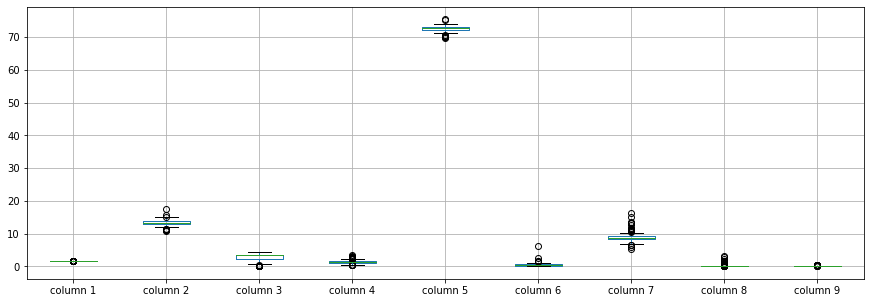

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.518365
column 2    13.400049
column 3     2.736633
column 4     1.447672
column 5    72.638708
column 6     0.482459
column 7     8.935506
column 8     0.160598
column 9     0.057009
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,-0.202483,-0.136394,-0.382051,-0.595089,-0.300982,0.811659,0.057518,0.143010
column 2,-0.202483,1.000000,-0.294401,0.101538,-0.027555,-0.298995,-0.240174,0.246101,-0.229688
column 3,-0.136394,-0.294401,1.000000,-0.472598,-0.149782,0.011506,-0.430059,-0.459975,0.069392
column 4,-0.382051,0.101538,-0.472598,1.000000,0.000484,0.270958,-0.209210,0.469627,-0.054255
column 5,-0.595089,-0.027555,-0.149782,0.000484,1.000000,-0.080508,-0.300805,-0.161247,-0.124806
column 6,-0.300982,-0.298995,0.011506,0.270958,-0.080508,1.000000,-0.312241,0.005009,0.011100
column 7,0.811659,-0.240174,-0.430059,-0.209210,-0.300805,-0.312241,1.000000,-0.074451,0.181632
column 8,0.057518,0.246101,-0.459975,0.469627,-0.161247,0.005009,-0.074451,1.000000,-0.050811
column 9,0.143010,-0.229688,0.069392,-0.054255,-0.124806,0.011100,0.181632,-0.050811,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [21]:
imputer = md.Midas(layer_structure = [9,9+35,9+35+35,9+35+35+35,9+35+35+35+35,9+35+35+35+35+35,9+35+35+35+35+35+35,9+35+35+35+35+35,9+35+35+35+35,9+35+35+35,9+35+35,9+35,9], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=67)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 87.35587721604567
Epoch: 1 , loss: 86.96187239426833
Epoch: 2 , loss: 87.29633918175331
Epoch: 3 , loss: 87.74710728571965
Epoch: 4 , loss: 87.34010784442609
Epoch: 5 , loss: 87.6822010920598
Epoch: 6 , loss: 87.31194892296425
Epoch: 7 , loss: 87.25139676607571
Epoch: 8 , loss: 87.71672762357272
Epoch: 9 , loss: 87.32722913301907
Epoch: 10 , loss: 87.20663158710187
Epoch: 11 , loss: 87.64374659611629
Epoch: 12 , loss: 87.17925849327675
Epoch: 13 , loss: 88.04977534367488
Epoch: 14 , loss: 87.18738908034105
Epoch: 15 , loss: 87.20168363131009
Epoch: 16 , loss: 87.17466501089243
Epoch: 17 , loss: 87.6874759380634
Epoch: 18 , loss: 86.88456726074219
Epoch: 19 , loss: 87.51543661264273
Epoch: 20 , loss: 87.18585439828726
Epoch: 21 , loss: 87.245725778433
Epoch: 22 , loss: 87.20396364652194
Epoch: 23 , loss: 87.51312431922325
Epoch: 24 , loss: 87.15114065317007
Epoch: 25 , loss: 86.61202826866737
Epoch: 26 ,

In [22]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(214, 9)

In [23]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     1.51966
column 2    14.77000
column 3     3.75000
column 4     0.29000
column 5    72.02000
column 6     0.03000
column 7     9.00000
column 8     0.00000
column 9     0.00000
Name: 21, dtype: float64

In [24]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Glass.xlsx', header=None,names=column_names)

In [25]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.0
1,0.0,0.0,0.00000,-0.409380,-42.091019,0.00000,-2.51571,0.146028,0.0
2,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.0
3,0.0,0.0,-1.90487,-0.407703,-43.111875,-0.30465,0.00000,0.000000,0.0
4,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.0
210,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.0
211,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.0
212,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.0


Calculating NRMSE Value

In [26]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [27]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [28]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(270.04069311341686, 1090.4359815890969)

In [29]:
NRMS=numerator/denominator
NRMS


0.24764470145224432

In [30]:
new_df.iloc[66,:]

column 1     1.52152
column 2    13.05000
column 3     3.65000
column 4     0.87000
column 5    72.22000
column 6     0.19000
column 7     9.85000
column 8     0.00000
column 9     0.17000
Name: 66, dtype: float64

In [31]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49000,1.100000,71.780000,0.06000,8.75000,0.000000,0.0
1,1.51761,13.89,3.60000,0.950620,30.638981,0.48000,5.31429,0.146028,0.0
2,1.51618,13.53,3.55000,1.540000,72.990000,0.39000,7.78000,0.000000,0.0
3,1.51766,13.21,1.78513,0.882297,29.498125,0.26535,8.22000,0.000000,0.0
4,1.51742,13.27,3.62000,1.240000,73.080000,0.55000,8.07000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00000,2.880000,72.610000,0.08000,9.18000,1.060000,0.0
210,1.51685,14.92,0.00000,1.990000,73.060000,0.00000,8.40000,1.590000,0.0
211,1.52065,14.36,0.00000,2.020000,73.420000,0.00000,8.44000,1.640000,0.0
212,1.51651,14.38,0.00000,1.940000,73.610000,0.00000,8.48000,1.570000,0.0


In [32]:
imputations[-1].to_excel("Glass_AN_10(imp).xlsx", index=False, header=False)